In [1]:
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### map 2020 date to 2019 date in Lunar calendar

In [4]:
date_dic = {}
for i, d20 in enumerate(pd.date_range('20200101', '20200315')):
    # print(i, d20.date())
    d19 = pd.to_datetime('20190112')+pd.Timedelta(days=i)
    d19 = str(d19.date()).replace('-', '')
    d20 = str(d20.date()).replace('-', '')
    # print(d20, ' -> ', d19)
    
    date_dic[d20] = d19

In [5]:
date_dic['20200125']

'20190205'

### <div class="alert alert-block alert-info"> Outflow index for nine example cities </div>

In [6]:
cities = ['Wuhan', 
          'Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 
          'Zhengzhou', 'Nanjing', 'Changsha', 'Shenyang']
    

In [7]:
frames = []

for city in cities:

    # outflow index
    folder = 'Data/outflow_data'
    file_path = os.path.join(folder, f'outflow_{city}.csv')
    city_flow_df = pd.read_csv(file_path)
    city_flow_df['date'] = city_flow_df['date'].astype(str)

    date2index = city_flow_df.set_index('date')['migration_index'].to_dict()
    # date2index

    flow_df = pd.DataFrame(list(date_dic.items()), columns=['date2020', 'date2019'])
    flow_df['migration_index_2020'] = flow_df['date2020'].map(date2index)
    flow_df['migration_index_2019'] = flow_df['date2019'].map(date2index)

    # pd.to_datetime('20200101').strftime('%b %d')
    flow_df['date2020_str'] = flow_df['date2020'].map(lambda x: pd.to_datetime(x).strftime('%b %d'))
    flow_df['city'] = city
    
    frames.append(flow_df)


In [8]:
flow_df = pd.concat(frames)
flow_df.head()

,date2020,date2019,migration_index_2020,migration_index_2019,date2020_str,city
0,20200101,20190112,3.455298,5.052067,Jan 01,Wuhan
1,20200102,20190113,3.524602,4.058813,Jan 02,Wuhan
2,20200103,20190114,5.524427,4.004834,Jan 03,Wuhan
3,20200104,20190115,6.099818,3.724672,Jan 04,Wuhan
4,20200105,20190116,5.322478,3.990384,Jan 05,Wuhan


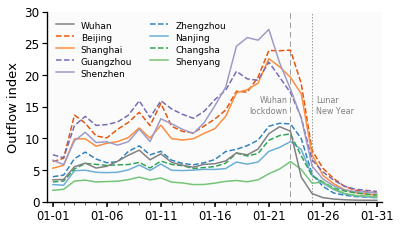

In [9]:

plot_df = flow_df.copy()
plot_df = plot_df[plot_df['date2020'].str.contains('202001')]

fig, ax = plt.subplots(figsize=(6, 3.5))

ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')

# 2020-01

text_color = '#46ac88'


colors = ['#e6550d', '#fd8d3c', 
          '#756bb1', '#9e9ac8', 
          '#3182bd', '#6baed6', 
          '#31a354', '#74c476', 
          '#a1d99b', '#c7e9c0',
         ]


# Wuhan
# ------------
city = 'Wuhan'
data = plot_df[plot_df['city']==city]
x = data['date2020']
y = data['migration_index_2020']

ax.plot(x, y, '-', 
        color='grey', 
        linewidth=1.5, 
        clip_on=False, 
        label=f'{city}', 
#         alpha=0.9,
        zorder=100,
       )



# other cities
# ------------
linestyles = ['--', '-',]

for (i, city) in enumerate(['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 
                            'Zhengzhou', 'Nanjing', 'Changsha', 'Shenyang']):

    data = plot_df[plot_df['city']==city]
    x = data['date2020']
    y = data['migration_index_2020']

    ax.plot(x, y, 
            # linestyle = '--', 
            linestyle = linestyles[i%len(linestyles)], 
            # color=f'C{i}', 
            color=colors[i], 
#             color=OrRd[4][i],
            linewidth=1.5, 
            clip_on=False, 
            label=f'{city}', 
    #         alpha=0.9,
            zorder=10,
           )

ymax=30
line_style = (0, (7.5, 5))
ax.vlines(x=list(x).index('20200123'), ymin=-5, ymax=ymax, linestyles=line_style, linewidth=.75, color='grey')
ax.text(x=list(x).index('20200123')-0.25, y=ymax/2-1, s='Wuhan\nlockdown', fontsize=8, ha='right', color='grey')

line_style = (0, (2, 2))
ax.vlines(x=list(x).index('20200125'), ymin=-5, ymax=ymax, linestyles=line_style, linewidth=.75, color='grey')
ax.text(x=list(x).index('20200125')+0.4, y=ymax/2-1, s='Lunar\nNew Year', fontsize=8, ha='left', color='grey')


N = len(x)

every_nth = 1
locs = range(0, N, every_nth)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

every_nth = 5
locs = range(0, N, every_nth)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))


locs = range(0, 35, 5)
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))


ticks = list(x)
ticks = list(x.str[-4:])

ticks = [t[:2]+'-'+t[-2:] for t in ticks]
# string date
plt.xticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='center',
           # va = 'center',
           position=(0, 0),
           # rotation_mode="anchor"
          )


real_legend = ax.legend(numpoints=1, fontsize=9, frameon=False, 
                         ncol=2,
                         handleheight=1.65, labelspacing=0.01,
                         loc='best', 
#                          bbox_to_anchor=(0.06, 0.1, 0.5, 0.9)
                       )


# ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Outflow index', fontsize=13)

border_width = 1.35
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Move left spines outward by 10 points
# ax.spines['left'].set_position(('outward', 10))

# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=3, labelsize=11.5, length=5, width=1.5, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=12, length=5, width=1.2, direction='out')
ax.tick_params(axis='both', which='minor', top=False, right=False, length=3,  width=.6, direction='out')

plt.xlim(-0.5, list(x).index('20200131')+0.5)
plt.ylim(0, 30)


# plt.tight_layout(pad=0.1)
out_dir = 'Outputs'

# plt.savefig(os.path.join(out_dir, 'fig3-city_outflow_2020_Jan.pdf'), pad_inches=0.01, box_inches=0.01)
# plt.savefig(os.path.join(out_dir, 'fig3-city_outflow_2020_Jan.svg'), pad_inches=0.01, box_inches=0.01)

### <div class="alert alert-block alert-danger">Outbreak Estimates</div>

* COVID-19 outbreak in other cities

In [10]:
# real case: number of cases on 2020-02-09 excludind Wuhan
number_base_cases = 23236

In [11]:
other_city_df = pd.read_csv('Data/negb_predicted_outbreak_size_by_area.csv')
# this file is obtained via Negative Binomial model using R, 
# see 'Figure3-outbreak analysis by R.ipynb' for further information

In [12]:
other_city_df['cases_increase'] = other_city_df['predicted_cumulative_cases'].map(
                    lambda x: (x/number_base_cases-1) * 100)

# dic = {'Xian': 'Xi\'an'}
other_city_df['city'] = other_city_df['city'].map(
                            lambda x: 'Xi\'an' if x=='Xian' else x)

other_city_df.sort_values(['predicted_cumulative_cases'], ascending=False, inplace=True)
other_city_df.reset_index(drop=True)

,city_cn,city,raw_predict,predicted_cumulative_cases,cases_increase
0,广州市,Guangzhou,43819.591973,43824,88.603891
1,北京市,Beijing,43722.089364,43719,88.152006
2,上海市,Shanghai,40726.771819,40737,75.318471
3,深圳市,Shenzhen,40363.955435,40363,73.708900
4,苏州市,Suzhou,33250.308588,33251,43.101222
5,成都市,Chengdu,30492.826295,30495,31.240317
6,杭州市,Hangzhou,27439.604889,27432,18.058186
7,郑州市,Zhengzhou,26258.649653,26253,12.984163
8,西安市,Xi'an,22668.715691,22664,-2.461697
9,南京市,Nanjing,21501.896627,21495,-7.492684


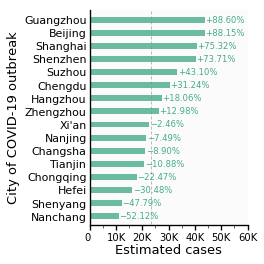

In [13]:
# fig, ax = plt.subplots(figsize=(6.45, 3))
fig, ax = plt.subplots(figsize=(3.5, 3.5))

ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')


plot_df = other_city_df.copy()
plot_df = plot_df.sort_values(['predicted_cumulative_cases'], ascending=True)

x1 = plot_df['city']
y1 = plot_df['predicted_cumulative_cases']

# bar plot
ax.barh(x1, y1,
                height=0.45,
#                 edgecolor='w',
                color='#46ac88', 
                alpha=.8,
#                 zorder=10,
                )


for (d, v, t) in zip(plot_df['city'], plot_df['predicted_cumulative_cases'], plot_df['cases_increase']):
    if t>0:
        # s = '+'+str(round(t, 2))+'%'
        s = '+'+f'{t:0.2f}'+'%'
    else:
        # s = "\N{MINUS SIGN}"+str(abs(round(t, 2)))+'%'
        s = "\N{MINUS SIGN}"+f'{abs(t):0.2f}'+'%'
    ax.text(x=v+180, y=list(x1).index(d), s=s, 
            horizontalalignment='left', verticalalignment='center', 
            fontdict={'color':'#46ac88', 
                      # 'size':11, 
                      'size':8.5, 
                       #'weight':'bold'
                      },
            zorder=10,
           )

line_style = (0, (3, 2))
ax.vlines(x=number_base_cases, ymin=-1, ymax=len(x1), linestyles=line_style, linewidth=1., color='#bbbbbb', zorder=-1,)
# ax.vlines(x=22198, ymin=-1, ymax=len(x1), linestyles=line_style, linewidth=1., color='dodgerblue', zorder=1, alpha=0.5)


N = len(x1)

every_nth = 1
locs = range(0, N, every_nth)
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))


ticks = list(x1)
# ticks = [city_cn2en[c] for c in ticks]
plt.yticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='right',
           # va = 'center',
           position=(0, 0)
           # rotation_mode="anchor",
          )

# print(ticks)



locs = range(0, 70000, 5000)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

locs = range(0, 70000, 10000)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))

ticks = [f'{int(i/1000)}K' for i in locs[1:]]
ticks.insert(0, '0 ')
plt.xticks(locs, ticks)


border_width = 1.35
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# for k, spine in ax.spines.items():  #ax.spines is a dictionary
#     spine.set_zorder(20)


# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=3, labelsize=10, length=5, width=1.35, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=11, length=0, width=1.2, direction='out')
ax.tick_params(axis='both', which='minor', top=False, right=False, length=3,  width=.6, direction='out')


# # # plt.xlim(-1)
ax.set_ylim(bottom=-1+0.35, top=N-0.25)
ax.set_xlim(left=0, right=60000)


ax.set_xlabel('Estimated cases', fontsize=13, labelpad=1)
ax.set_ylabel('City of COVID-19 outbreak', fontsize=13)

plt.tight_layout(pad=0.1)
out_dir = 'Outputs'
plt.savefig(os.path.join(out_dir, 'fig3-predicted_cases_by_outbreak_city.pdf'), pad_inches=0.01, box_inches=0.01)